In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px

In [2]:
# loading dataset to the pandas dataframe
df = pd.read_csv('final_movies.csv')
df.head()

,title,released_year,rated_class,run_time,stars,total_ratings,genre,summary
0,Madame Web,2024.0,PG,1h 56m,3.8,28K,Action|Adventure|Sci-Fi,Cassandra Webb is a New York metropolis parame...
1,Borderlands,2024.0,NaN,1h 42m,NaN,NaN,Action|Adventure|Comedy,The popular video game set on the abandoned fi...
2,Oppenheimer,2023.0,14A,3h,8.4,654K,Biography|Drama|History,The story of American scientist J. Robert Oppe...
3,Dune: Part Two,2024.0,PG,2h 46m,9.1,28K,Action|Adventure|Drama,Paul Atreides unites with Chani and the Fremen...
4,Poor Things,2023.0,18A,2h 21m,8.3,115K,Comedy|Drama|Romance,The incredible tale about the fantastical evol...


In [3]:
# inspecting rows and columns of our dataset
df.shape

(3650, 8)

In [4]:
# Basic information of our dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3650 non-null   object 
 1   released_year  3580 non-null   float64
 2   rated_class    3415 non-null   object 
 3   run_time       3516 non-null   object 
 4   stars          3486 non-null   float64
 5   total_ratings  3486 non-null   object 
 6   genre          3616 non-null   object 
 7   summary        3613 non-null   object 
dtypes: float64(2), object(6)
memory usage: 228.3+ KB


We can see that every columns except title has some missing values

In [5]:
# calculating the missing percentage in each columns
(df.isnull().mean())* 100

title            0.000000
released_year    1.917808
rated_class      6.438356
run_time         3.671233
stars            4.493151
total_ratings    4.493151
genre            0.931507
summary          1.013699
dtype: float64

## Data cleaning and preprocessing

In [6]:
class Utils:
    """
    Utility wrapper class that provides functionality for cleaning Helper class
    """
    
    number_pattern = re.compile(r'[0-9]*')
    
    @staticmethod
    def convert_to_minutes(run_time):
        minutes = 0
        x = run_time.split(' ')
        match = re.match(Utils.number_pattern, x[0])
        s = match.start()
        e = match.end()
        hours = int(x[0][s:e])
        minutes += int(match[0])* 60
        if len(x) > 1:
            match = re.match(Utils.number_pattern, x[1])
            s = match.start()
            e = match.end()
            mins = int(x[1][s:e])
            minutes += int(mins)
        return minutes


class DataCleaningHelper:

    @staticmethod
    def convert_total_rating(item):
        if type(item) != float:
            if '.' in item:
                item = item.replace('K', '00')
                item = item.replace('M', '00000')
            else:
                item = item.replace('K', '000')
                item = item.replace('M', '000000')
            item = item.replace('.', '')
            return int(item)
        return np.nan

    @staticmethod
    def categorize_run_time(item):
        if type(item) == str:
            minutes = Utils.convert_to_minutes(item)
            if minutes < 90:
                return 'very short'
            elif minutes < 120:
                return 'short'
            elif minutes < 150:
                return 'medium'
            return 'long'
                
        else:
            return np.nan

    @staticmethod
    def categorize_rated_class(item):
        if type(item) == str:
            if item not in ['PG', '14A', '18A', 'R', 'G', '13+', '16+', '18+']:
                return 'Other'
            else:
                return item
        else:
            return np.nan
    

In [7]:
df.head(10)

,title,released_year,rated_class,run_time,stars,total_ratings,genre,summary
0,Madame Web,2024.0,PG,1h 56m,3.8,28K,Action|Adventure|Sci-Fi,Cassandra Webb is a New York metropolis parame...
1,Borderlands,2024.0,NaN,1h 42m,NaN,NaN,Action|Adventure|Comedy,The popular video game set on the abandoned fi...
2,Oppenheimer,2023.0,14A,3h,8.4,654K,Biography|Drama|History,The story of American scientist J. Robert Oppe...
3,Dune: Part Two,2024.0,PG,2h 46m,9.1,28K,Action|Adventure|Drama,Paul Atreides unites with Chani and the Fremen...
4,Poor Things,2023.0,18A,2h 21m,8.3,115K,Comedy|Drama|Romance,The incredible tale about the fantastical evol...
5,Anyone But You,2023.0,14A,1h 43m,6.3,41K,Comedy|Romance,"After an amazing first date, Bea and Ben's fie..."
6,The Zone of Interest,2023.0,PG,1h 45m,7.6,36K,Drama|History|War,Auschwitz commandant Rudolf Höss and his wife ...
7,Dune,2021.0,PG,2h 35m,8.0,773K,Action|Adventure|Drama,A noble family becomes embroiled in a war for ...
8,Bob Marley: One Love,2024.0,PG,1h 47m,6.5,11K,Biography|Drama|Music,The story of how reggae icon Bob Marley overca...
9,Land of Bad,2024.0,14A,1h 53m,6.5,7.6K,Action|Thriller,A US Army special forces unit is ambushed duri...


In [8]:
df['total_ratings'] = df['total_ratings'].apply(DataCleaningHelper.convert_total_rating)
df['run_time'] = df['run_time'].apply(DataCleaningHelper.categorize_run_time)
df['rated_class'] = df['rated_class'].apply(DataCleaningHelper.categorize_rated_class)

In [9]:
df.head(10)

,title,released_year,rated_class,run_time,stars,total_ratings,genre,summary
0,Madame Web,2024.0,PG,short,3.8,28000.0,Action|Adventure|Sci-Fi,Cassandra Webb is a New York metropolis parame...
1,Borderlands,2024.0,NaN,short,NaN,NaN,Action|Adventure|Comedy,The popular video game set on the abandoned fi...
2,Oppenheimer,2023.0,14A,long,8.4,654000.0,Biography|Drama|History,The story of American scientist J. Robert Oppe...
3,Dune: Part Two,2024.0,PG,long,9.1,28000.0,Action|Adventure|Drama,Paul Atreides unites with Chani and the Fremen...
4,Poor Things,2023.0,18A,medium,8.3,115000.0,Comedy|Drama|Romance,The incredible tale about the fantastical evol...
5,Anyone But You,2023.0,14A,short,6.3,41000.0,Comedy|Romance,"After an amazing first date, Bea and Ben's fie..."
6,The Zone of Interest,2023.0,PG,short,7.6,36000.0,Drama|History|War,Auschwitz commandant Rudolf Höss and his wife ...
7,Dune,2021.0,PG,long,8.0,773000.0,Action|Adventure|Drama,A noble family becomes embroiled in a war for ...
8,Bob Marley: One Love,2024.0,PG,short,6.5,11000.0,Biography|Drama|Music,The story of how reggae icon Bob Marley overca...
9,Land of Bad,2024.0,14A,short,6.5,7600.0,Action|Thriller,A US Army special forces unit is ambushed duri...


In [10]:
# def get_genre_count(col: pd.Series)-> dict:
#     genre_map = dict()
#     for i in col:
#         if type(i) == str:
#             genres = i.split('|')
#             if 'Film-Noir' in genres or 'War' in genres:
#                 print(genres)
#             for j in genres:
#                 if j in genre_map:
#                     genre_map[j] += 1
#                 else:
#                     genre_map[j] = 1
#     return genre_map

# genre_count = get_genre_count(df['genre'])
# dict(sorted(genre_count.items(), key=lambda item: item[1]))

### Removing movies that will be released in future

In [11]:
df[df['released_year'] > 2024].head()

,title,released_year,rated_class,run_time,stars,total_ratings,genre,summary
50,The Fantastic Four,2025.0,NaN,NaN,NaN,NaN,Action|Adventure|Sci-Fi,One of Marvel's most iconic families makes it ...
103,Superman: Legacy,2025.0,NaN,NaN,NaN,NaN,Action|Adventure|Fantasy,Follows the titular superhero as he reconciles...
243,Michael,2025.0,NaN,NaN,NaN,NaN,Biography|Drama|History,The story of the famous musician Michael Jacks...
406,Captain America: Brave New World,2025.0,NaN,NaN,NaN,NaN,Action|Adventure|Sci-Fi,Plot kept under wraps. Fourth movie in the Cap...
488,Mission: Impossible - Dead Reckoning Part Two,2025.0,NaN,NaN,NaN,NaN,Action|Adventure|Thriller,The 8th entry in the long running Mission Impo...


In [12]:
df = df[df['released_year'] <= 2024]
df.shape

(3560, 8)

# Data visualization

#### Movies released year distribution

C:\Users\rojit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



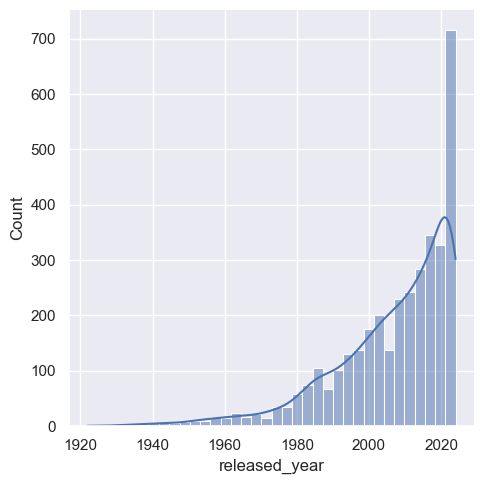

In [19]:
sns.set_theme()
sns.displot(df['released_year'], kde=True)

#### Star distribution plot

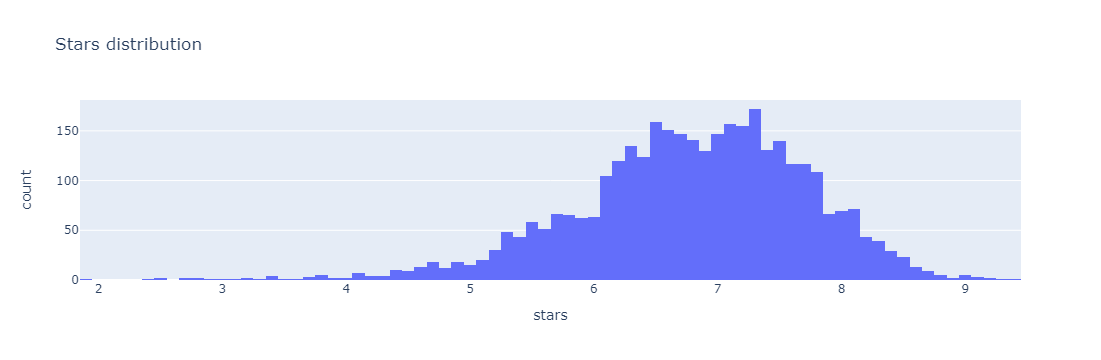

In [18]:
fig = px.histogram(df, x='stars', title='Stars distribution')
fig.show()

#### Stars and rating relation

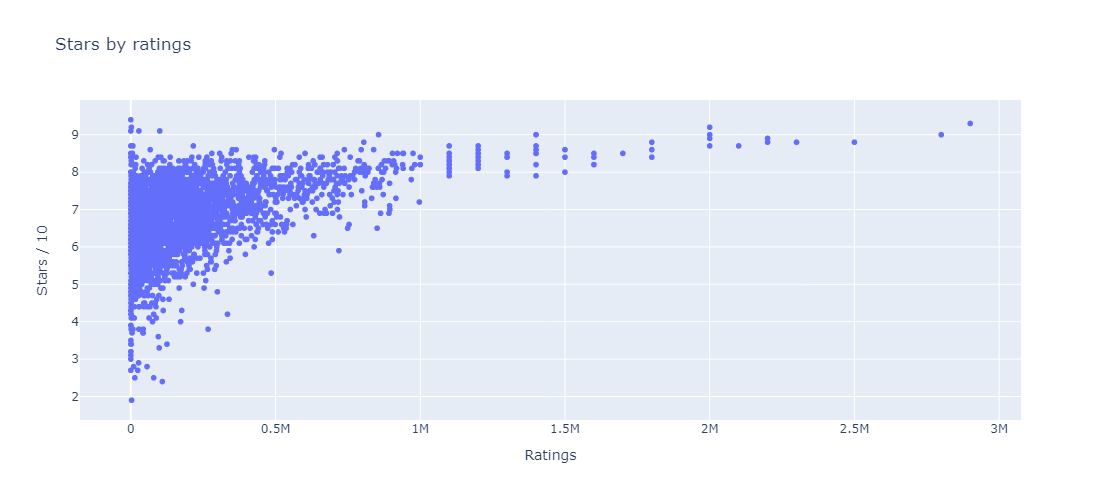

In [15]:
fig = px.scatter(x=df['total_ratings'], y=df['stars'], height=500, title="Stars by ratings")
fig.update_layout(
    xaxis_title='Ratings',
    yaxis_title='Stars / 10',
)
fig.show()

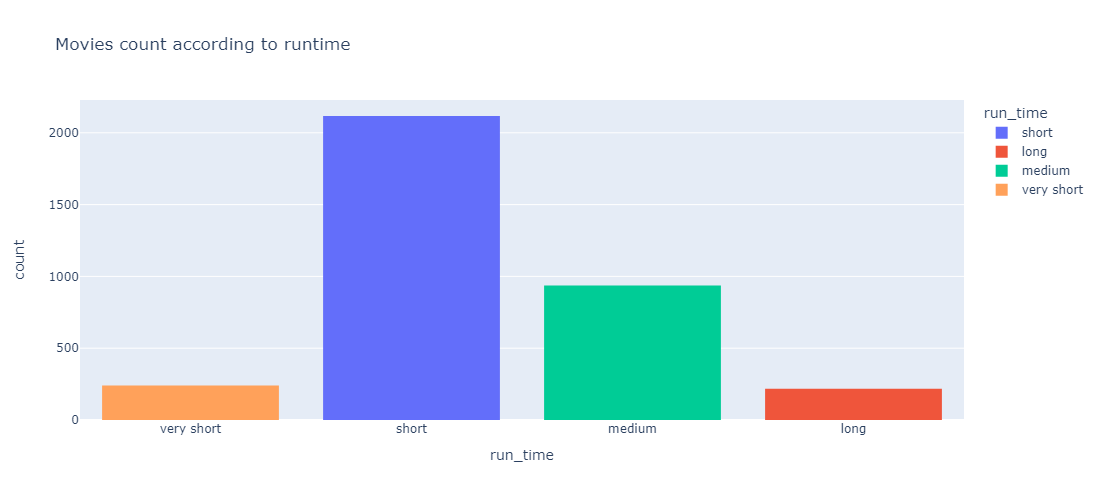

In [34]:
fig = px.histogram(df, x='run_time', color='run_time', title='Movies count according to runtime', height=500)
fig.update_layout(xaxis={'categoryarray':['very short','short','medium','long']})
fig.show()

#### movies distribution according to rated class

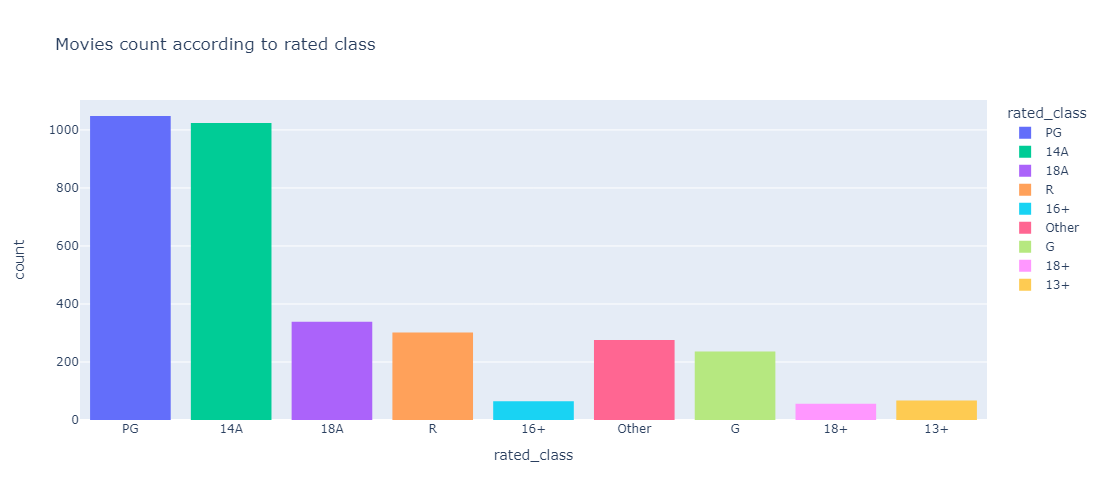

In [33]:
fig = px.histogram(df, x='rated_class', color='rated_class', title='Movies count according to rated class', height=500)
fig.show()

#### Grouping by movies rated class and runtime

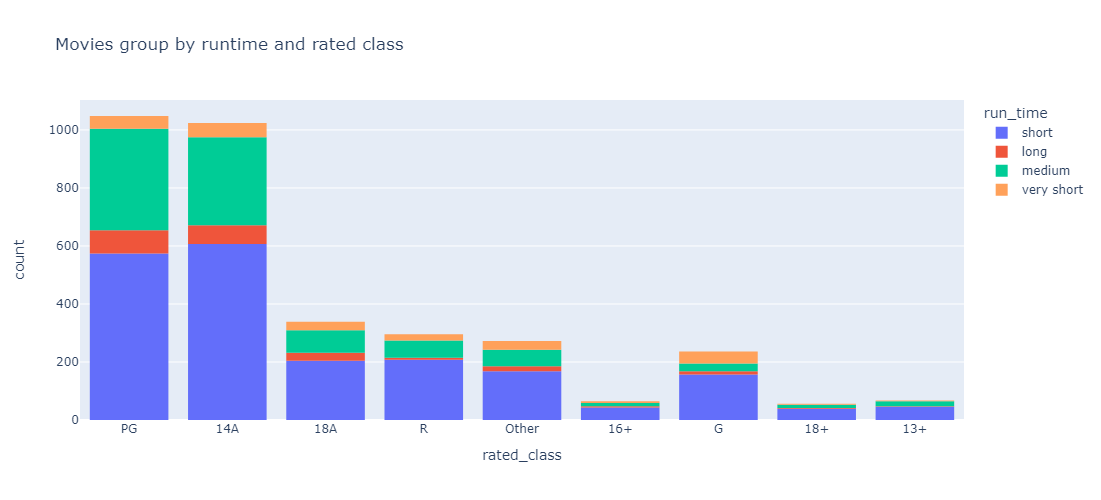

In [36]:
fig = px.histogram(df, x='rated_class', color='run_time', title='Movies group by runtime and rated class', height=500)
fig.show()